BEE(kcal/day) 1567.0900000000001
患者データ ['M', 38, 170.0, 66.0]
1回目の血液ガス採血 [7.4, 50.0, 80.0, 24.0]
1回目の呼吸状態 [400, 15]
1回目のAaDO2: 75.76046511627908
2回目の血液ガス採血 [7.4, 40.0, 80.0, 24.0]
2回目の呼吸状態 [500, 15]
2回目のAaDO2: 87.38837209302326
VA1(ml/f):  220.12976927104535
VD1(ml/f) 179.87023072895465
VA2(ml/f):  275.16221158880666
VD2(ml/f) 224.83778841119334
deltaVD= VD2 - VD1 44.96755768223869

横軸を目標CO2、縦軸を目標換気量としたグラフ


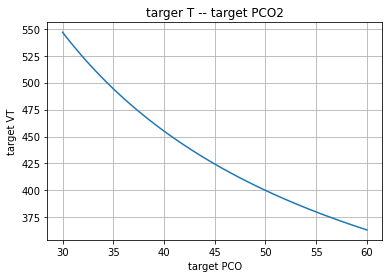

In [2]:
import numpy as np
import math
from matplotlib import pyplot

#患者パラメーター　性別、年齢、身長、体重
PTDATA = ['M', 38, 170.0, 66.0]

#吸入気酸素濃度。空気なら0.21 2回の採血の間で変更しないことが前提なので
FiO2 = 0.30

#1回目の血ガス結果とパラメータ
#血液ガス採血 PH PCO2 PO2 HCO3
#呼吸状態パラメータ
BGA1 = [7.400, 50.0, 80.0, 24.0]
RESPSTATE1 = [400, 15] #一回換気量、呼吸回数

#2回目の血ガス結果とのパラメータ
BGA2 = [7.400, 40.0, 80.0, 24.0]
RESPSTATE2 = [500, 15] #一回換気量、呼吸回数


#患者パラメの変数への入力
GENDER = str(PTDATA[0])
AGE = float(PTDATA[1])
HEIGHT = float(PTDATA[2])
WEIGHT = float(PTDATA[3])

#1、2回めの結果の変数への入力
PH1 = float(BGA1[0])
PCO21 = float(BGA1[1])
PO21 = float(BGA1[2])
HCO31 = float(BGA1[3])
VT1 = float(RESPSTATE1[0])
f1 = float(RESPSTATE1[1])

PH2 = float(BGA2[0])
PCO22 = float(BGA2[1])
PO22 = float(BGA2[2])
HCO32 = float(BGA2[3])
VT2 = float(RESPSTATE2[0])
f2 = float(RESPSTATE2[1])

#ほぼ固定の各種パラメータ
R = 0.86 #呼吸商。基本的に0.86で計算するように固定しておく
SaVaP = 47.0 #飽和水蒸気圧 47.0mmHgで固定
K = (863/1.44)/(3.941/0.86 + 1.106) #定数Kの算出

#AaDO2関数
def AaDO2(SaVaP, R, FiO2, PO2, PCO2):
    a = (760 - SaVaP)* FiO2 - PO2 - ( PCO2 / R )
    return a

# VAを求める関数
def VA(K, EE, PCO2, f):
    a = K * EE / ( PCO2 * f )
    return a

#死腔を求める関数
def VD(VT, VA):
    a = VT - VA
    return a

# Harris-Benedict式
SI = 1.0
AI = 1.0 #とりあえずわかりにくいので1.0で両方とも固定
if GENDER == 'M':
    BEE = 66.47 + 13.75 * WEIGHT + 5.0 * HEIGHT - 6.76 * AGE
    EE = BEE * SI * AI
elif GENDER == 'F':
    BEE = 655.1 + 9.56 * WEIGHT + 1.85 * HEIGHT - 4.68 * AGE
    EE = BEE * SI * AI
else:
    BEE =  66.47 + 13.75 * WEIGHT + 5.0 * HEIGHT - 6.76 * AGE
    EE = BEE * SI * AI
    print('FでもMでもないのでMと判断します')
print('BEE(kcal/day)', EE)


#パラーメータ比較
print('患者データ', PTDATA)
print('1回目の血液ガス採血', BGA1)
print('1回目の呼吸状態', RESPSTATE1)
print('1回目のAaDO2:', AaDO2(SaVaP, R, FiO2, PO21, PCO21))
print('2回目の血液ガス採血', BGA2)
print('2回目の呼吸状態', RESPSTATE2)
print("2回目のAaDO2:", AaDO2(SaVaP, R, FiO2, PO22, PCO22))

VA1=VA(K, EE, PCO21, f1)
print('VA1(ml/f): ', VA1)
print('VD1(ml/f)', VD(VT1 ,VA1))

VA2=VA(K, EE, PCO22, f2)
print('VA2(ml/f): ', VA2)
print('VD2(ml/f)', VD(VT2 ,VA2))

#2回めの血ガス採血時の死腔の評価　1回目のVD1との比較
print('deltaVD= VD2 - VD1', VD(VT2 ,VA2) - VD(VT1 ,VA1))


#グラフ
print()
print('横軸を目標CO2、縦軸を目標換気量としたグラフ')
x = np.linspace(30 ,60)
y = VT1 + ( K * EE )* (1/(x * f2) - 1/(PCO21 * f1))

pyplot.plot(x, y)
pyplot.title("targer T -- target PCO2")
pyplot.xlabel('target PCO')
pyplot.ylabel('target VT')
pyplot.grid(True)
pyplot.show()

